# Lab 10

This week, we are focusing on gradient descent. Like last week, we wil be using the fake employee dataset with the goal of finding the best parameters for linear regression. The goals for this week are:

0. Reviewing grid search and the drawbacks of it
1. Motivate the process for gradient descent
2. Detail the steps of gradient descent
3. Define the learning rate for gradient descent and the impact of it on the speed of the algorithm





### Before we start

Let us import the packages that we need for today and the dataset from last time.


In [1]:
## Import block
%matplotlib notebook 

import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d 
import seaborn as sns; sns.set()

import numpy as np
import pandas as pd

In [2]:
## Functions for later use

def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',
                    linewidth=2,
                    shrinkA=0, shrinkB=0, color="lightblue")
    ax.annotate('', v1, v0, arrowprops=arrowprops)
    
def place_parameter(p_vec, col, ax=None):
    plt.scatter(p_vec[0],p_vec[1], c=col, marker = "*")
    
def draw_parameter_path(p0,p1, col, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',
                    linewidth=2,
                    shrinkA=0, shrinkB=0, color=col)
    ax.annotate('', p1, p0, arrowprops=arrowprops)   
    
def compute_mse(truth_vec, predict_vec):
    return np.mean((truth_vec - predict_vec)**2)
    

In [ ]:
## Import Data

employ_data = pd.read_csv("../Lab09/lab9data.csv", sep = ",")

## numpy vectors of our inputs
neuro = employ_data[["neuroticism"]].to_numpy()
perform = employ_data[["performance"]].to_numpy()

In [ ]:
# For function testing 




### Reviewing Grid Search

Last time, we introduced grid search, a process of testing all combinations of parameter values by first laying out a _grid_ of the combinations with each parameter on its own axis. For example: 

<table>
<thead>
<tr>
    <th></th>
<th>m = 0</th>
    <th>m = 0.5</th>
    <th>m = 1.5</th>
    <th>m = 2</th>
    <th>...</th>
</tr>
</thead>
<tbody>
<tr>
<th>b = 0</th>
    <td>(0,0) </td>
    <td>(0,0.5)</td>
    <td>(0,1.5) </td>
    <td>(0,2)</td>
    <td>(0,...) </td>
</tr>
<tr>
<th>b = 1/3</th>
    <td>(1/3,0) </td>
    <td>(1/3,0.5)</td>
    <td>(1/3,1.5) </td>
    <td>(1/3,2)</td>
    <td>(1/3,...) </td>
</tr>
<tr>
<th>b = 2/3</th>
    <td>(2/3,0) </td>
    <td>(2/3,0.5)</td>
    <td>(2/3,1.5) </td>
    <td>(2/3,2)</td>
    <td>(2/3,...) </td>
</tr>
<tr>
<th>b = 1</th>
    <td>...</td>
    <td>...</td>
    <td>...</td>
    <td>...</td>
    <td>...</td>
</tr>
<tr>
<th>b = 4/3</th>
    <td>...</td>
    <td>...</td>
    <td>...</td>
    <td>...</td>
    <td>...</td>
</tr>
</tbody>
</table>


In a grid search, we then replace each entry with some evaluation metric relating to how those parameters do when plugged into a desired algorithmic formulation (say a line $y = m*x+b$) at predicting our data. Last class, we will use the _mean squared error_ for this evaluation:

$MSE(truth, guess) = avg(truth - guess)^2$

Say we have $n_1$ number of possible values for the first parameter and $n_2$ number of possible values for the second parameter, how many times do we compute the MSE? 


(Add your thoughts here!)

This is a lot of computations! After all these computations, we then have to compute a minimum. 

Gradient descent allows us to speed this process up and allows us to find the minimum directly. Let's take moment to see how this could work by reminding ourselves of the surface created by the evaluation matrix last time: 

In [ ]:
# Set the possible values for our parameters
m_vec = np.arange(-3, 10, 0.1)
b_vec = np.arange(-2, 60, 0.2)

# Create a place to store the values 
# HINT - Look at the above matrix! 
eval_mat = np.zeros([len(m_vec),len(b_vec)])

# Try (or loop) over all possible combinations
# HINT think nested
for m_inds in range(len(m_vec)):
    m = m_vec[m_inds]
    for b_inds in range(len(b_vec)):
        b = b_vec[b_inds]
        preds = m*neuro + b
        
        goodness = compute_mse(perform,preds)
        eval_mat[m_inds,b_inds] = goodness

In [ ]:
fig = plt.figure()
ax = plt.axes(projection='3d')
bs,ms = np.meshgrid(b_vec,m_vec)

# Create the SCATTER() plot with colors
ax.plot_surface(ms,bs, eval_mat, cmap='viridis',edgecolor='none');


Pick a high place on the surface and with the goal of finding the minimum in our mind, how would you like to travel on this surface to find the minimum? 

Does your path always move such that you are parallel to the $m$-axis and/or parallel to the $b$-axis? 

**_Wait here for a class discussion_**

Charting this path that may curve as you move down the surface is the goal of _gradient descent._ We aim to _descend,_ little by little as dictated by the _gradient._ So what is the gradient?

To answer this, let's consider that we begin our search at $m=0$ and $b=0$. How should we change $m$ and $b$ to move towards the minimum fastest? 

Below we have two possibilities; which is better? Justify your answer.

<IPython.core.display.Javascript object>


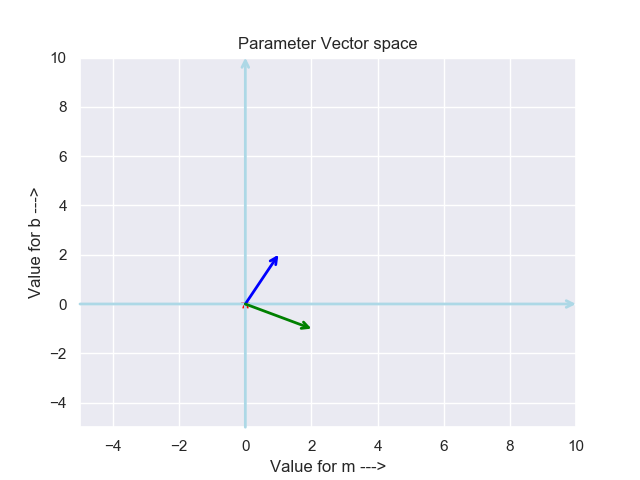

Text(0.5, 1.0, 'Parameter Vector space')

In [4]:
fig = plt.figure()

# Set axis limits
xmin = -5
xmax = 10
ymin = -5
ymax = 10

plt.xlim([xmin, xmax])
plt.ylim([ymin, ymax])

# Build axes
draw_vector([xmin,0], [xmax,0])
draw_vector([0,ymin], [0,ymax])

# Option 1
draw_parameter_path([0,0],[1,2], "blue")

# Option 2 
draw_parameter_path([0,0],[2,-1],"green")

# Starting parameter
place_parameter([0,0],"red")

# Create grid and labels
plt.grid(True)
plt.xlabel('Value for m --->')
plt.ylabel('Value for b --->')
plt.title('Parameter Vector space')

In [ ]:
# Extra code block

## Gradient

The gradient is a version of a multi-variable derivative, but whose direction tells us how to move in the steepest direction. Effectively, the gradient is the answer to the question _"How should we change the parameters to move towards the minimum fastest?"_

In [ ]:
fig = plt.figure()

# Set axis limits
xmin = -5
xmax = 10
ymin = -5
ymax = 10

plt.xlim([xmin, xmax])
plt.ylim([ymin, ymax])

# Build axes
draw_vector([xmin,0], [xmax,0])
draw_vector([0,ymin], [0,ymax])

# Create grid and labels
plt.grid(True)
plt.xlabel('Value for m --->')
plt.ylabel('Value for b --->')
plt.title('Parameter Vector space')

In [ ]:
ind = np.unravel_index(np.argmin(eval_mat, axis=None), eval_mat.shape)

# Trick from example on https://docs.scipy.org/doc/numpy/reference/generated/numpy.argmin.html

In [ ]:
print("Minimum of eval_mat is", eval_mat[ind], "\n")
print("This min is found at m =", ms[ind], "and b=", bs[ind])

So why are we plotting anything at all? Well, grid search is not the most efficient way to search for parameters. So what could be alternative? 

Notice, we have not actually computed a linear regression. Instead we have the form of the output ($y = m*x +b$) and have been just putting parameters into the $m$ and $b$ places. So how could we do this kind of "blind" search better? 

#### Gradient Descent....

NEXT WEEK! 

#### Resources consulted 

1. [Linear Regression using Gradient Descent](https://towardsdatascience.com/linear-regression-using-gradient-descent-97a6c8700931)
2. [Gradient in Wolfram](http://mathworld.wolfram.com/Gradient.html)